In [1]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, roc_auc_score

# Load Dataset

In [2]:
# Read the train dataset
train_df = pd.read_csv('train_data.csv')
train_df.head(10)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
5,5100411,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13251,-3839,1,1,0,0,Accountants,2.0,-1.0,0
6,5022817,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-17262,-1617,1,0,0,0,Core staff,2.0,-16.0,0
7,5009811,F,N,N,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-11813,-3266,1,1,1,0,Sales staff,3.0,-21.0,0
8,5113922,F,N,N,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,-23478,365243,1,0,0,0,NaN,1.0,-50.0,0
9,5021541,F,Y,N,1,306000.0,Working,Higher education,Married,House / apartment,-9310,-1678,1,0,0,0,NaN,3.0,-13.0,0


In [3]:
# Read the test dataset
test_df = pd.read_csv('test_data.csv')
test_df.head(10)

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
5,5029195,F,N,Y,0,94500.0,Working,Secondary / secondary special,Married,House / apartment,-18131,-617,1,0,0,0,Laborers,2.0,-18.0,0
6,5029213,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22115,365243,1,0,1,0,NaN,2.0,-23.0,0
7,5051050,M,Y,N,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,-22407,-2174,1,0,0,0,Laborers,2.0,-9.0,0
8,5061569,F,N,N,0,189000.0,Working,Secondary / secondary special,Married,Municipal apartment,-18452,-137,1,0,0,0,Laborers,2.0,-37.0,0
9,5091430,F,N,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16202,-2939,1,1,1,0,Managers,2.0,-43.0,0


# Exploratory Data Analysis 

In [4]:
# Merge the datasets
credit_card_df = pd.concat([train_df, test_df], ignore_index=True)

# Display the first few rows of the merged dataset
print(credit_card_df.head())

        ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phone  \
0       With par

In [5]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null 

In [6]:
# Summary statistics
print(credit_card_df.describe())

                 ID  Children count        Income           Age  \
count  3.645700e+04    36457.000000  3.645700e+04  36457.000000   
mean   5.078227e+06        0.430315  1.866857e+05 -15975.173382   
std    4.187524e+04        0.742367  1.017892e+05   4200.549944   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042028e+06        0.000000  1.215000e+05 -19438.000000   
50%    5.074614e+06        0.000000  1.575000e+05 -15563.000000   
75%    5.115396e+06        1.000000  2.250000e+05 -12462.000000   
max    5.150487e+06       19.000000  1.575000e+06  -7489.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       36457.000000             36457.0      36457.000000  36457.000000   
mean        59262.935568                 1.0          0.225526      0.294813   
std        137651.334859                 0.0          0.417934      0.455965   
min        -15713.000000                 1.0          0.000000      0.000000

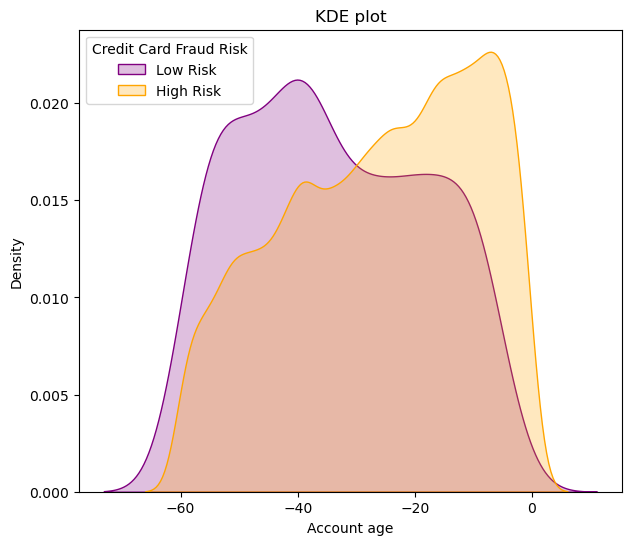

In [7]:
plt.figure(figsize=(7, 6))
sb.kdeplot(data=credit_card_df, x='Account age', hue='Is high risk', fill=True, common_norm=False, palette={0: 'orange', 1: 'purple'})
plt.title('KDE plot')
plt.xlabel('Account age')
plt.ylabel('Density')
plt.legend(title='Credit Card Fraud Risk', loc='upper left', labels=['Low Risk', 'High Risk'])
plt.show()

# Univariate analysis

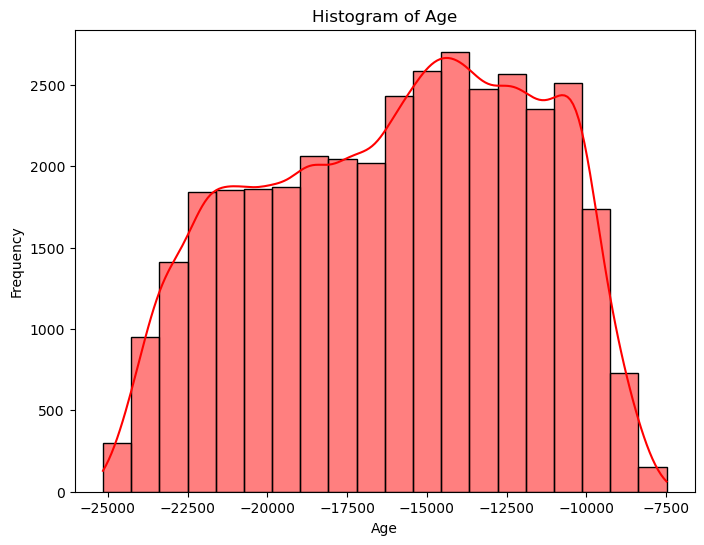

In [8]:
# Histogram for one numerical variable
numeric_column = 'Age'

plt.figure(figsize=(8, 6))
sb.histplot(credit_card_df[numeric_column], bins=20, kde=True, color='red')
plt.title(f'Histogram of {numeric_column}')
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.show()

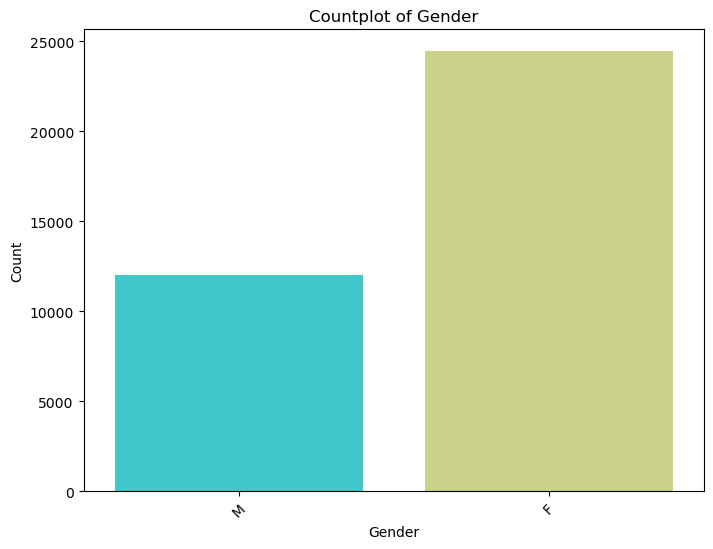

In [9]:
# Countplot for categorical variables
object_col = 'Gender'

plt.figure(figsize=(8, 6))
sb.countplot(data=credit_card_df, x=object_col, palette='rainbow')
plt.title(f'Countplot of {object_col}')
plt.xlabel(object_col)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

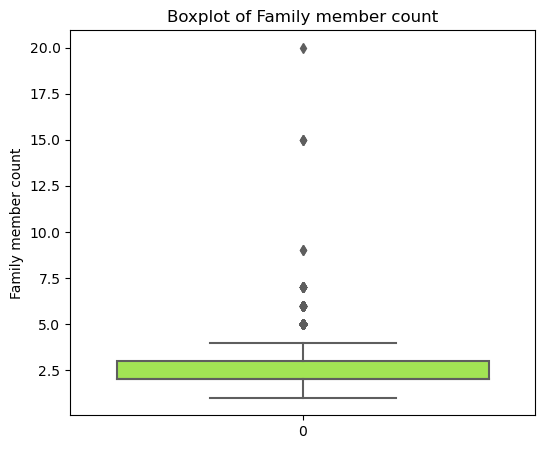

In [10]:
# Box plot of one variable
plt.figure(figsize=(6, 5))
sb.boxplot(data=credit_card_df['Family member count'], palette='turbo')
plt.title(f'Boxplot of Family member count')
plt.ylabel('Family member count')
plt.show()

# Bivariate analysis

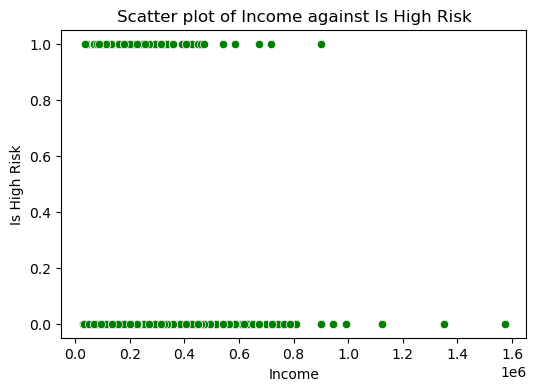

In [11]:
# Scatter plot to correlate two data points
plt.figure(figsize=(6, 4))
sb.scatterplot(data=credit_card_df, x='Income', y='Is high risk', color = 'green')
plt.title('Scatter plot of Income against Is High Risk')
plt.xlabel('Income')
plt.ylabel('Is High Risk')
plt.show()

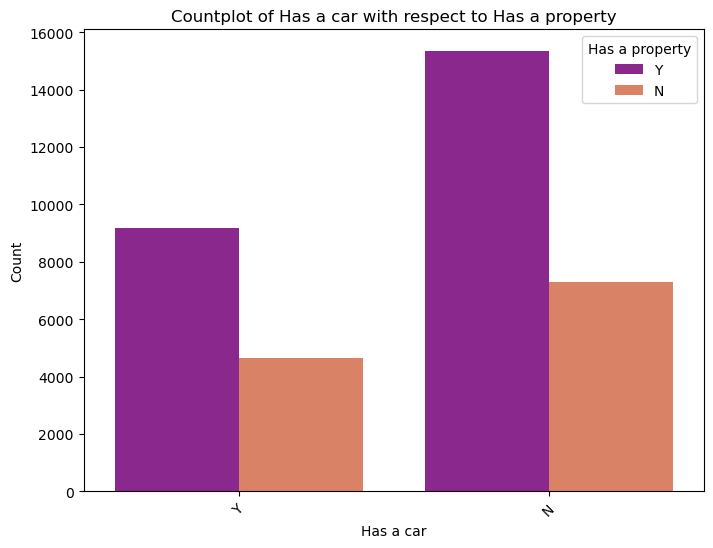

In [12]:
# Two object columns for comparison
object_col1 = 'Has a car'
object_col2 = 'Has a property'

# Countplot for comparing two categorical variables
plt.figure(figsize=(8, 6))
sb.countplot(data=credit_card_df, x=object_col1, hue=object_col2, palette='plasma')
plt.title(f'Countplot of {object_col1} with respect to {object_col2}')
plt.xlabel(object_col1)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title=object_col2)
plt.show()

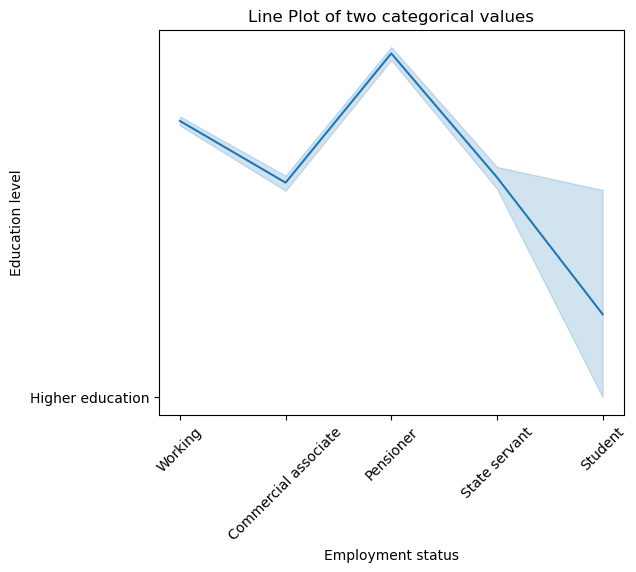

In [13]:
# Line plot for comparing two categorical variables
plt.figure(figsize=(6, 5))
sb.lineplot(data=credit_card_df, x='Employment status', y='Education level')
plt.title(f'Line Plot of two categorical values')
plt.xlabel('Employment status')
plt.ylabel('Education level')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [14]:
# Creating interaction terms
credit_card_df['Income_Per_Child'] = credit_card_df['Income'] / (credit_card_df['Children count'] + 1)
credit_card_df['Income_Age_Ratio'] = credit_card_df['Income'] / credit_card_df['Age']

# Generating new features based on domain knowledge
credit_card_df['High_Income_Age_Ratio'] = (credit_card_df['Income'] > 100000) & (credit_card_df['Age'] > 30)

# Displaying the updated dataset
print(credit_card_df.head(5))

        ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling  ...  Has a work phone  Has a phone  Has an email  \
0       With

# Data Preprocessing

In [15]:
# Handling null attributes 
print(train_df.isna().sum())

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [16]:
# Handling null attributes 
print(test_df.isna().sum())

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [17]:
# Removing null attributes
print(train_df.dropna(inplace = True))
print(test_df.dropna(inplace = True))

None
None


In [18]:
# Feature engineering for both train_df and test_df
for df in [train_df, test_df]:
    label_encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = label_encoder.fit_transform(df[col])

In [19]:
# Separate features and target variable
X_train = train_df.drop('Is high risk', axis=1)
y_train = train_df['Is high risk']

X_test = test_df.drop('Is high risk', axis=1)
y_test = test_df['Is high risk']

In [20]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Machine Learning Model Development

In [21]:
# Initialize models
log_reg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()
boosting_model = GradientBoostingClassifier()

# Train models
log_reg_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
boosting_model.fit(X_train_scaled, y_train)

# Predictions
log_reg_preds = log_reg_model.predict(X_test_scaled)
decision_tree_preds = decision_tree_model.predict(X_test_scaled)
random_forest_preds = random_forest_model.predict(X_test_scaled)
boosting_preds = boosting_model.predict(X_test_scaled)

# Calculate accuracy scores
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_preds)
random_forest_accuracy = accuracy_score(y_test, random_forest_preds)
boosting_accuracy = accuracy_score(y_test, boosting_preds)

# Model Evaluation

In [22]:
# Evaluation
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("Boosting Accuracy:", boosting_accuracy)

Logistic Regression Accuracy: 0.9843875100080064
Decision Tree Accuracy: 0.9699759807846277
Random Forest Accuracy: 0.9821857485988791
Boosting Accuracy: 0.9837870296236989


In [23]:
# Additional evaluation metrics or reports
print("\nLogistic Regression Report:\n", classification_report(y_test, log_reg_preds))
print("\nDecision Tree Report:\n", classification_report(y_test, decision_tree_preds))
print("\nRandom Forest Report:\n", classification_report(y_test, random_forest_preds))
print("\nBoosting Report:\n", classification_report(y_test, boosting_preds))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4918
           1       0.00      0.00      0.00        78

    accuracy                           0.98      4996
   macro avg       0.49      0.50      0.50      4996
weighted avg       0.97      0.98      0.98      4996


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      4918
           1       0.17      0.24      0.20        78

    accuracy                           0.97      4996
   macro avg       0.58      0.61      0.59      4996
weighted avg       0.98      0.97      0.97      4996


Random Forest Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4918
           1       0.35      0.17      0.23        78

    accuracy                           0.98      4996
   macro avg       0.67      0.58      0.61      4

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


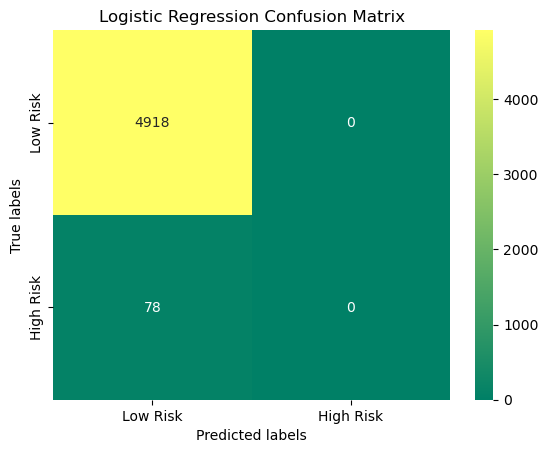

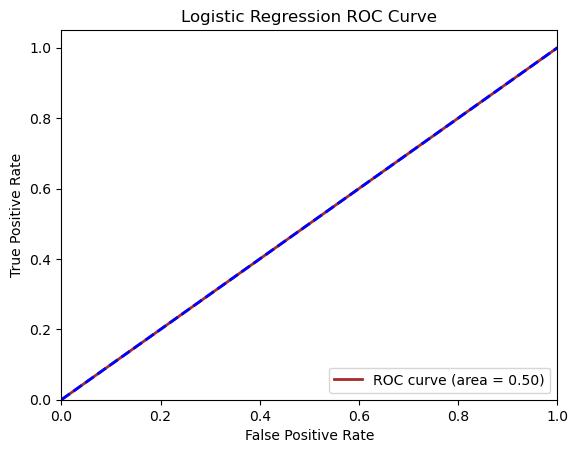

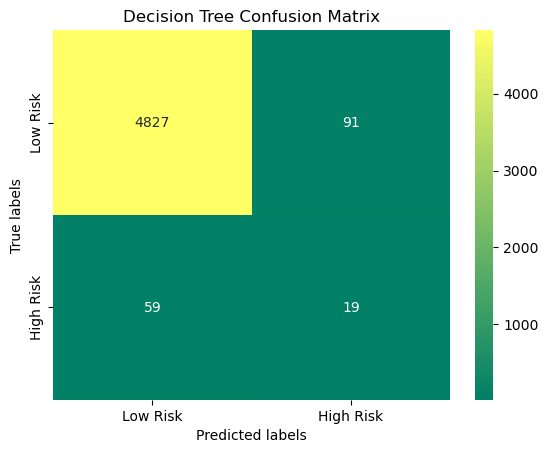

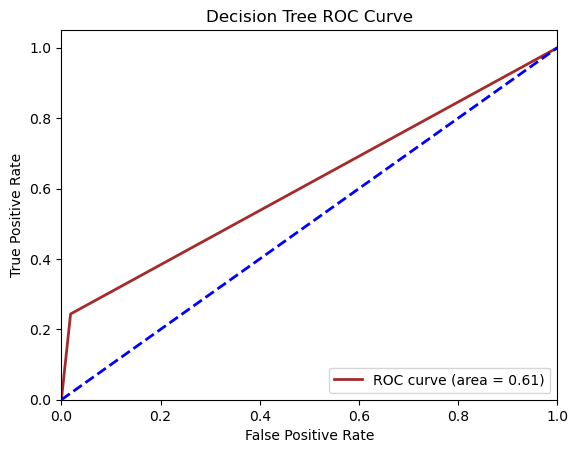

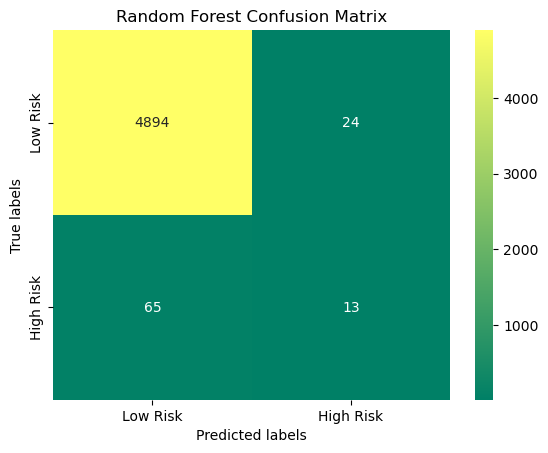

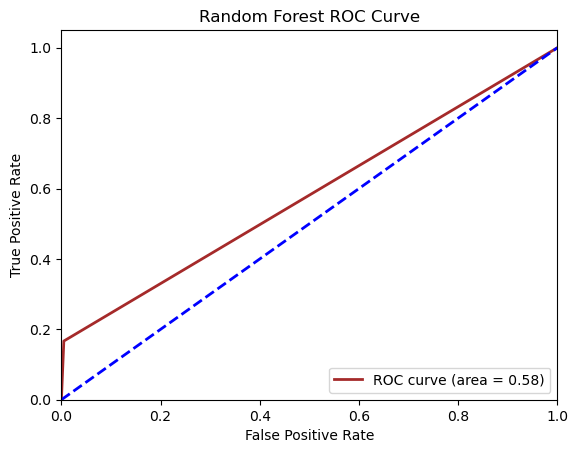

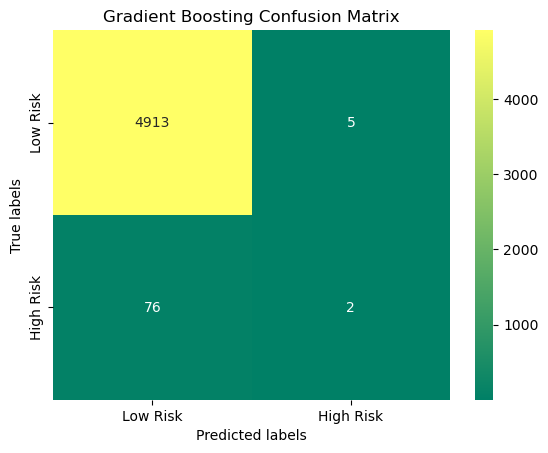

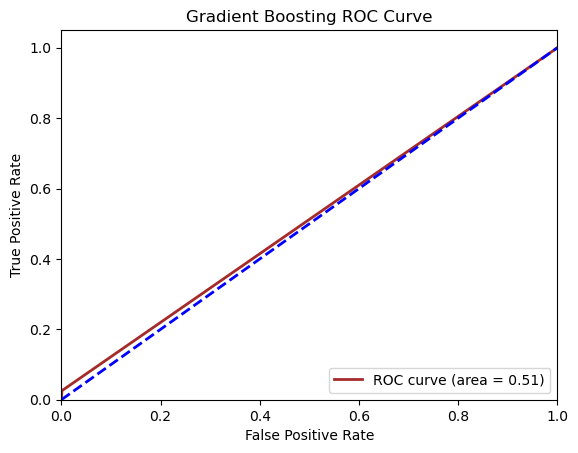

In [24]:
# Confusion Matrix and AUC ROC plots
models = {'Logistic Regression': log_reg_preds, 
          'Decision Tree': decision_tree_preds,
          'Random Forest': random_forest_preds,
          'Gradient Boosting': boosting_preds}

for model_name, y_pred in models.items():
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plt.title(f'{model_name} Confusion Matrix')
    sb.heatmap(cm, annot=True, cmap=plt.cm.summer, fmt='g', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
    
    # AUC ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, color='brown', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    

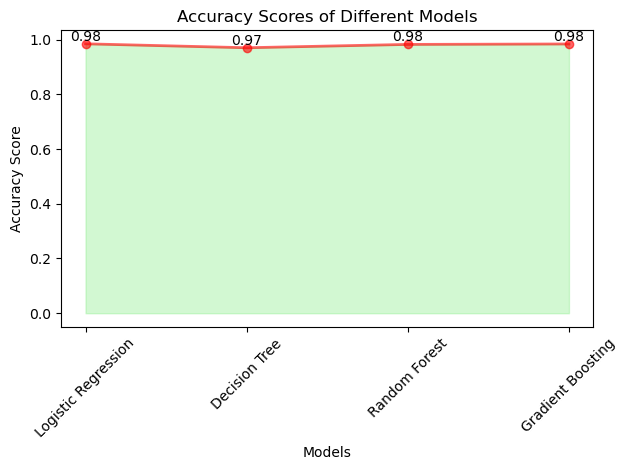

In [25]:
# Compare all models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [log_reg_accuracy, decision_tree_accuracy, random_forest_accuracy, boosting_accuracy]

plt.fill_between(models, accuracy_scores, color="lightgreen", alpha=0.4)
plt.plot(models, accuracy_scores, marker='o', color="red", alpha=0.6, linewidth=2)

# Annotate each point with its accuracy score
for i, score in enumerate(accuracy_scores):
    plt.text(models[i], accuracy_scores[i], f'{score:.2f}', ha='center', va='bottom')

plt.title('Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()